# Import Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
warnings.filterwarnings('ignore')

# EDA

## Load Dataset

In [78]:
data = pd.read_csv('/content/drive/MyDrive/AusWeather.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Data Information

Summary of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dimension of the dataset

In [14]:
data.shape

(145460, 23)

## Statistical Summary

### Numerical Variables

In [11]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Categorical Variables

In [13]:
data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## Check Null Data

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Univariate Analysis

### Target Variable - RainTomorrow

Null Value

In [4]:
data['RainTomorrow'].isnull().sum()

3267

In [16]:
print('Percentage of Null Data: ', data['RainTomorrow'].isnull().sum() / len(data['RainTomorrow']) * 100, '%')

Percentage of Null Data:  2.245978275814657 %


Unique Value

In [12]:
print('Total Number of Unique Values  :', data['RainTomorrow'].nunique())
print('Unique Values                  :', data['RainTomorrow'].unique())

Total Number of Unique Values  : 2
Unique Values                  : ['No' 'Yes' nan]


Frequency Distribution

In [30]:
# Count of Values
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [28]:
# Percentage of Count of Values (Null Included)
print('Percentage before removing null values:')
data['RainTomorrow'].value_counts() / len(data['RainTomorrow']) * 100

Percentage before removing null values:


No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64

In [29]:
# Percentage of Count of Values (Null Excluded)
print('Percentage after removing null values:')
data['RainTomorrow'].value_counts() / (len(data['RainTomorrow']) - data['RainTomorrow'].isnull().sum()) * 100

Percentage after removing null values:


No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

Frequency Distribution - Bar Chart

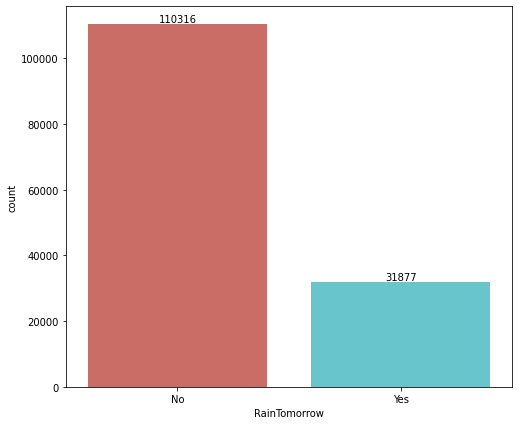

In [5]:
# Bar Chart for RainTomorrow
plt.figure(figsize=[8, 7])
ax = sns.countplot(x = "RainTomorrow", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.show()

Frequency Distribution - Pie Chart

In [37]:
rainTomorrowValue = data['RainTomorrow'].value_counts(dropna=False).values
print(rainTomorrowValue)

rainTomorrowColumn = data['RainTomorrow'].unique()
print(rainTomorrowColumn)

[110316  31877   3267]
['No' 'Yes' nan]


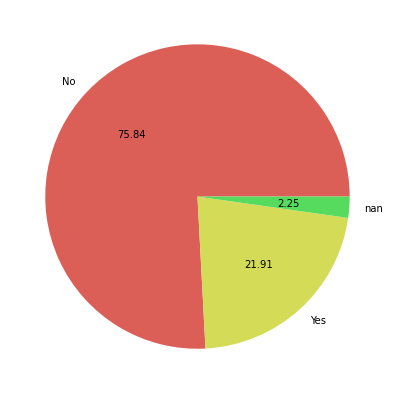

In [42]:
plt.figure(figsize=[8, 7])
colors = sns.color_palette('hls')
plt.pie(rainTomorrowValue, labels = rainTomorrowColumn, colors = colors, autopct='%.2f')
plt.show()

Frequency Distribution - Scatter Plot

<AxesSubplot:xlabel='MinTemp', ylabel='Sunshine'>

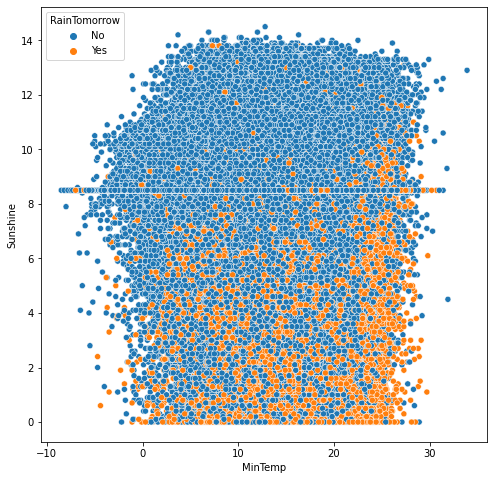

In [53]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data, x ='MinTemp', y = 'Sunshine', hue = 'RainTomorrow')

Pre-processing 1 - Remove Null Value from Target Variable

In [79]:
data = data.dropna(subset=['RainTomorrow'])
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [80]:
# Check data shape after removing null values from target variable
data.shape

(142193, 23)

## Categorical and Numerical Variables Analysis

Variable Type

In [6]:
# Split the categorical and numerical variable
numericalData = data.select_dtypes(np.number)
categoricalData = data.select_dtypes(object)

### Categorical Data

In [8]:
print('There are {} categorical variables.'.format(len(categoricalData.columns)))
print('The categorical variables are :', list(categoricalData))

There are 7 categorical variables.
The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Null Value

In [9]:
categoricalData.isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [10]:
for column in categoricalData:
  print('Percentage of Null Data in', column, ': ', data[column].isnull().sum() / len(data) * 100, '%')

Percentage of Null Data in Date :  0.0 %
Percentage of Null Data in Location :  0.0 %
Percentage of Null Data in WindGustDir :  6.561504434114197 %
Percentage of Null Data in WindDir9am :  7.041837502549352 %
Percentage of Null Data in WindDir3pm :  2.6569521706413113 %
Percentage of Null Data in RainToday :  0.9887969168665124 %
Percentage of Null Data in RainTomorrow :  0.0 %


Frequency Distribution

In [16]:
for column in categoricalData: 
  print('Total Number of Unique Values:', data[column].nunique())
  print(data[column].value_counts())
  print()

Total Number of Unique Values: 3436
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

Total Number of Unique Values: 49
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
Gol

Unique Value or Cardinality

In [17]:
for column in categoricalData:
  print('Total Number of Unique Labels for', column ,':', categoricalData[column].nunique())

Total Number of Unique Labels for Date : 3436
Total Number of Unique Labels for Location : 49
Total Number of Unique Labels for WindGustDir : 16
Total Number of Unique Labels for WindDir9am : 16
Total Number of Unique Labels for WindDir3pm : 16
Total Number of Unique Labels for RainToday : 2
Total Number of Unique Labels for RainTomorrow : 2


Pre-processing 2 - Handling High Cardinality in Date

In [81]:
# Convert Date from String to Datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day from Date and store into separate columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [83]:
# Drop original date column
data.drop('Date', axis=1, inplace = True)

In [84]:
# Rearrange the year, month, and day sequence
data = data[['Year', 'Month', 'Day', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
             'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
             'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
             'RainToday', 'RainTomorrow']]

In [85]:
data.head()

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Explore Each Categorical Variable

In [12]:
# Reassign categorical variable
categoricalData = data.select_dtypes(object)

In [13]:
print('Total {0} categorical variables which are \n {1}.'.format(len(categoricalData.columns), list(categoricalData)))

Total 6 categorical variables which are 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'].


Total Null Value   : 0
Total Label Count  : 49


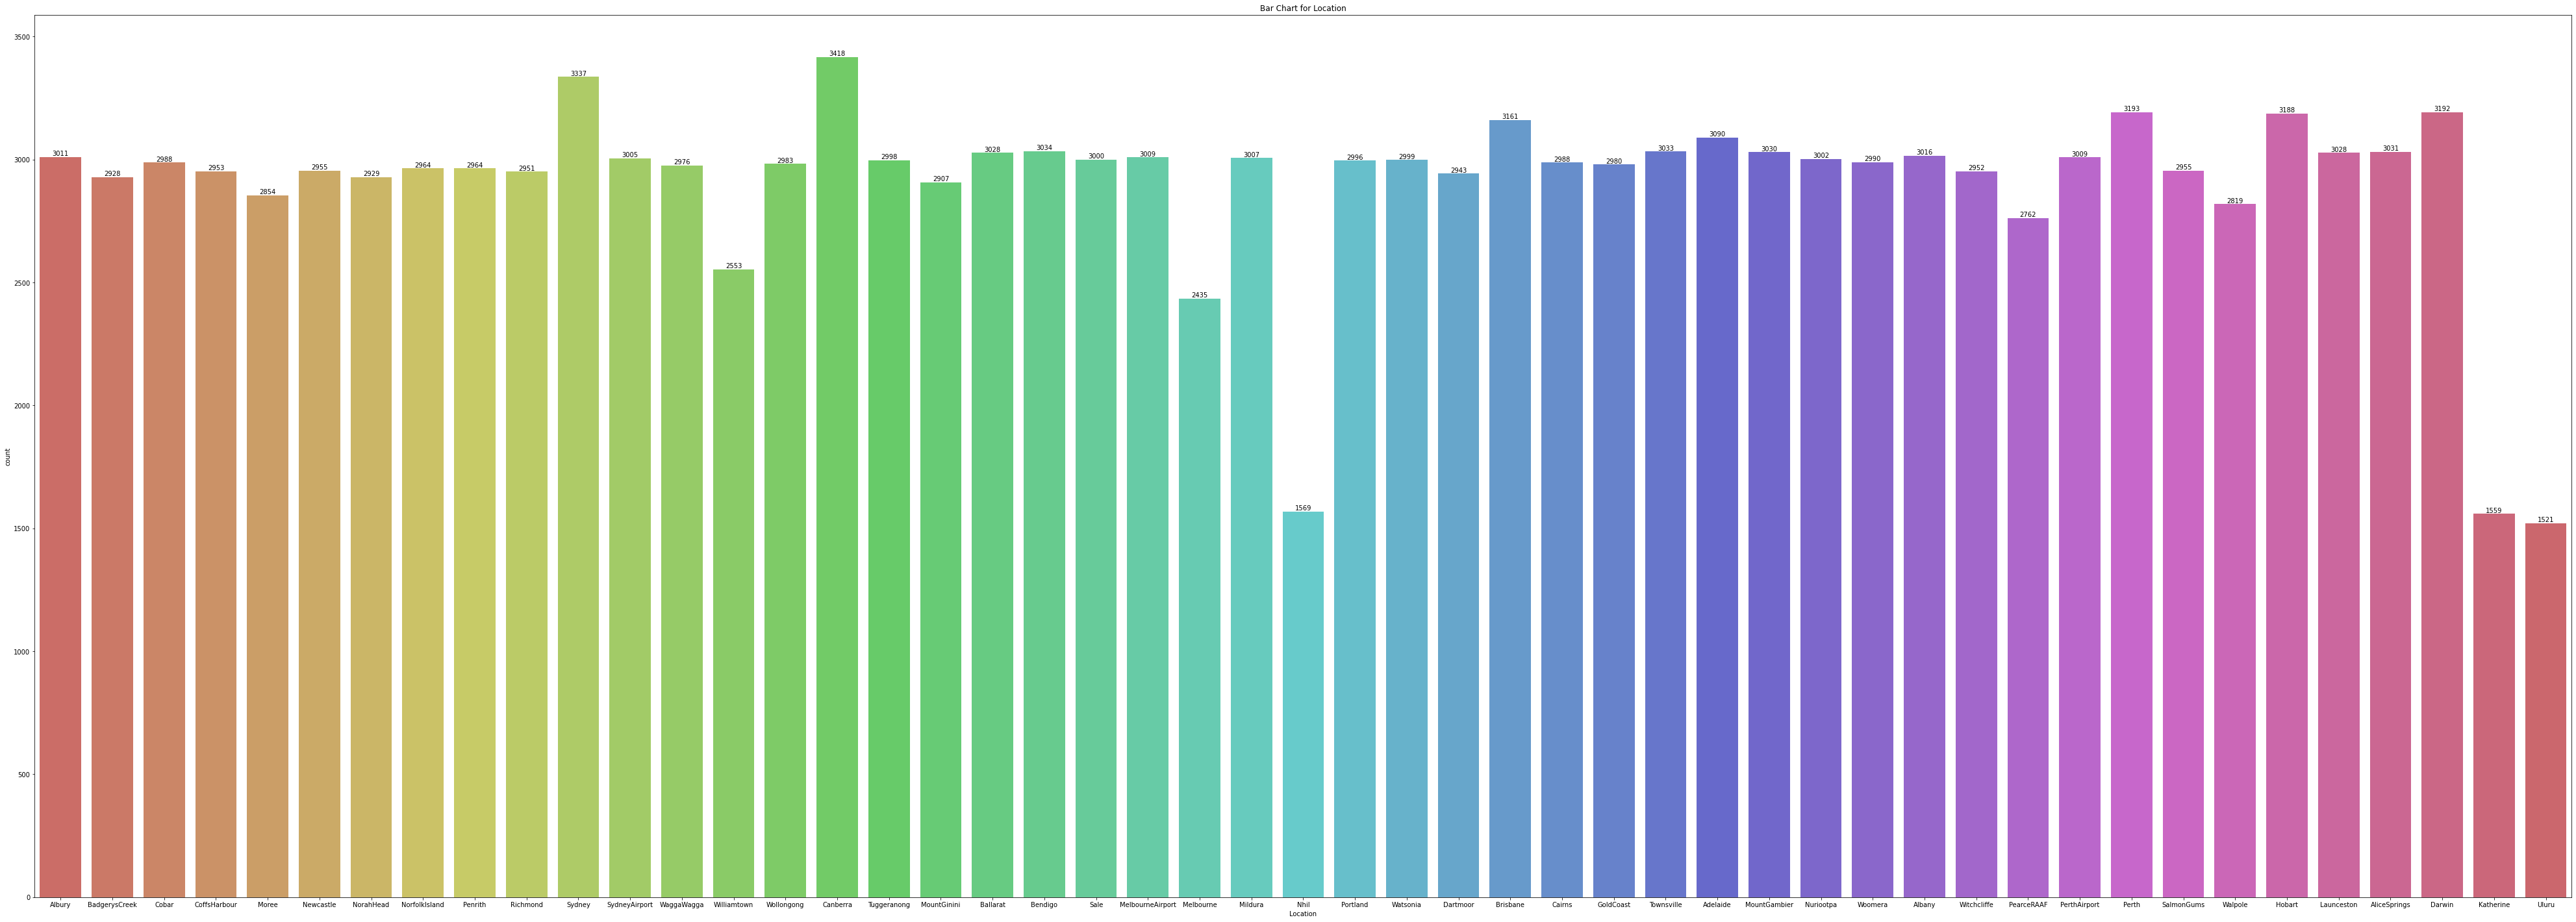

In [14]:
# Location
# Find Null Value Count
print('Total Null Value   :', categoricalData.Location.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.Location.nunique())
# Bar Chart for Location
plt.figure(figsize=[70, 25])
ax = sns.countplot(x = "Location", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for Location')
plt.show()

Total Null Value   : 9330
Total Label Count  : 16


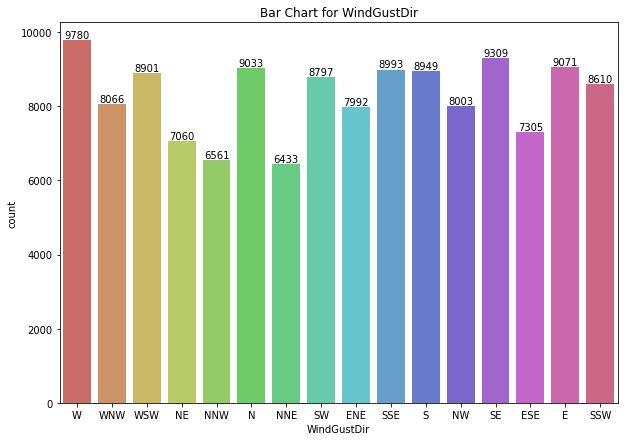

In [50]:
# WindGustDir
# Find Null Value Count
print('Total Null Value   :', categoricalData.WindGustDir.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.WindGustDir.nunique())
# Bar Chart for WindGustDir
plt.figure(figsize=[10, 7])
ax = sns.countplot(x = "WindGustDir", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for WindGustDir')
plt.show()

Total Null Value   : 10013
Total Label Count  : 16


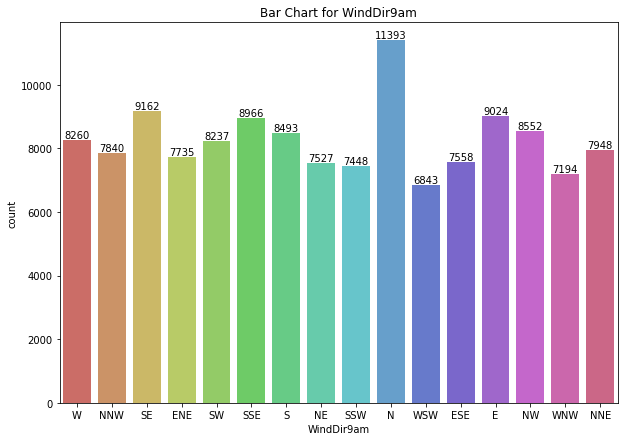

In [51]:
# WindDir9am
# Find Null Value Count
print('Total Null Value   :', categoricalData.WindDir9am.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.WindDir9am.nunique())
# Bar Chart for WindDir9am
plt.figure(figsize=[10, 7])
ax = sns.countplot(x = "WindDir9am", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for WindDir9am')
plt.show()

Total Null Value   : 3778
Total Label Count  : 16


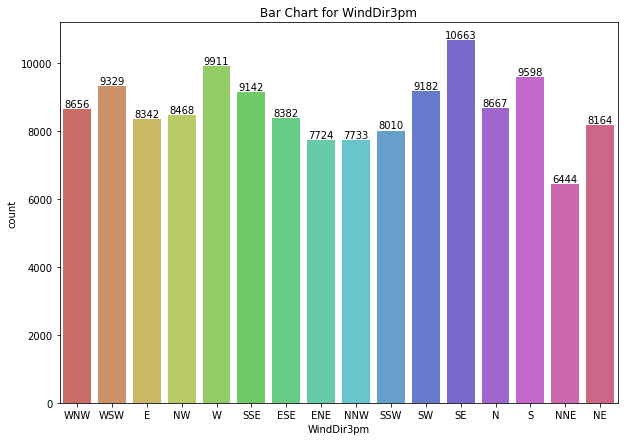

In [52]:
# WindDir3pm
# Find Null Value Count
print('Total Null Value   :', categoricalData.WindDir3pm.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.WindDir3pm.nunique())
# Bar Chart for WindDir3pm
plt.figure(figsize=[10, 7])
ax = sns.countplot(x = "WindDir3pm", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for WindDir3pm')
plt.show()

Total Null Value   : 1406
Total Label Count  : 2


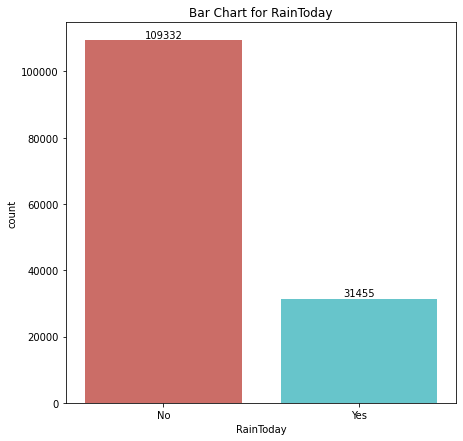

In [56]:
# RainToday
# Find Null Value Count
print('Total Null Value   :', categoricalData.RainToday.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.RainToday.nunique())
# Bar Chart for RainToday
plt.figure(figsize=[7, 7])
ax = sns.countplot(x = "RainToday", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for RainToday')
plt.show()

Total Null Value   : 0
Total Label Count  : 2


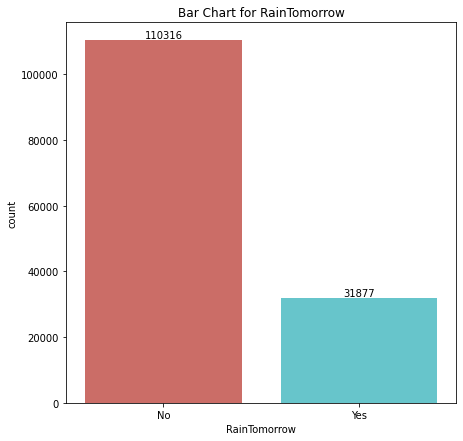

In [62]:
# RainTomorrow
# Find Null Value Count
print('Total Null Value   :', categoricalData.RainTomorrow.isnull().sum())
# Find Label Count 
print('Total Label Count  :', categoricalData.RainTomorrow.nunique())
# Bar Chart for RainTomorrow
plt.figure(figsize=[7, 7])
ax = sns.countplot(x = "RainTomorrow", data = data, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.title('Bar Chart for RainTomorrow')
plt.show()

### Numerical Data

In [15]:
# Reassign numerical variable
numericalData = data.select_dtypes(np.number)

In [16]:
print('There are {} numerical variables.'.format(len(numericalData.columns)))
print('The numerical variables are :', list(numericalData))

There are 19 numerical variables.
The numerical variables are : ['Year', 'Month', 'Day', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Null Value

In [17]:
numericalData.isnull().sum()

Year                 0
Month                0
Day                  0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [18]:
for column in numericalData:
  print('Percentage of Null Data in', column, ': ', data[column].isnull().sum() / len(data) * 100, '%')

Percentage of Null Data in Year :  0.0 %
Percentage of Null Data in Month :  0.0 %
Percentage of Null Data in Day :  0.0 %
Percentage of Null Data in MinTemp :  0.44798267143952236 %
Percentage of Null Data in MaxTemp :  0.2264527789694289 %
Percentage of Null Data in Rainfall :  0.9887969168665124 %
Percentage of Null Data in Evaporation :  42.78902618272348 %
Percentage of Null Data in Sunshine :  47.692924405561456 %
Percentage of Null Data in WindGustSpeed :  6.5193082641198945 %
Percentage of Null Data in WindSpeed9am :  0.948007285872019 %
Percentage of Null Data in WindSpeed3pm :  1.8495987847503041 %
Percentage of Null Data in Humidity9am :  1.247600092831574 %
Percentage of Null Data in Humidity3pm :  2.5388028946572616 %
Percentage of Null Data in Pressure9am :  9.85561877166949 %
Percentage of Null Data in Pressure3pm :  9.832410878172624 %
Percentage of Null Data in Cloud9am :  37.73533155640573 %
Percentage of Null Data in Cloud3pm :  40.15246882757942 %
Percentage of Null

Summary Statistics

In [70]:
round(numericalData.describe(), 2)

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.00,142193.00,142193.00,141556.00,141871.00,140787.00,81350.00,74377.00,132923.00,140845.00,139563.00,140419.00,138583.00,128179.00,128212.00,88536.00,85099.00,141289.00,139467.00
mean,2012.76,6.40,15.72,12.19,23.23,2.35,5.47,7.62,39.98,14.00,18.64,68.84,51.48,1017.65,1015.26,4.44,4.50,16.99,21.69
std,2.54,3.43,8.80,6.40,7.12,8.47,4.19,3.78,13.59,8.89,8.80,19.05,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,2007.00,1.00,1.00,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,2011.00,3.00,8.00,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,2013.00,6.00,16.00,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,2015.00,9.00,23.00,16.80,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,2017.00,12.00,31.00,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [19]:
# Use interquartile range to find outlier
for column in numericalData:
  # Find first quartile and third quartile
  q1 = numericalData[column].quantile(0.25)
  q3 = numericalData[column].quantile(0.75)

  # Find Interquartile Range
  iqr = q3 - q1

  # Find Lower Limit and Upper Limit
  lowerLimit = q1 - 1.5 * (iqr)
  upperLimit = q3 + 1.5 * (iqr)

  print(column)
  print('Lower Limit:', round(lowerLimit, 1), 'Min:', numericalData[column].min())
  print('Upper Limit:', round(upperLimit, 1), 'Max:', numericalData[column].max())
  print()

Year
Lower Limit: 2005.0 Min: 2007
Upper Limit: 2021.0 Max: 2017

Month
Lower Limit: -6.0 Min: 1
Upper Limit: 18.0 Max: 12

Day
Lower Limit: -14.5 Min: 1
Upper Limit: 45.5 Max: 31

MinTemp
Lower Limit: -6.2 Min: -8.5
Upper Limit: 30.6 Max: 33.9

MaxTemp
Lower Limit: 2.4 Min: -4.8
Upper Limit: 43.6 Max: 48.1

Rainfall
Lower Limit: -1.2 Min: 0.0
Upper Limit: 2.0 Max: 371.0

Evaporation
Lower Limit: -4.6 Min: 0.0
Upper Limit: 14.6 Max: 145.0

Sunshine
Lower Limit: -3.6 Min: 0.0
Upper Limit: 19.2 Max: 14.5

WindGustSpeed
Lower Limit: 5.5 Min: 6.0
Upper Limit: 73.5 Max: 135.0

WindSpeed9am
Lower Limit: -11.0 Min: 0.0
Upper Limit: 37.0 Max: 130.0

WindSpeed3pm
Lower Limit: -3.5 Min: 0.0
Upper Limit: 40.5 Max: 87.0

Humidity9am
Lower Limit: 18.0 Min: 0.0
Upper Limit: 122.0 Max: 100.0

Humidity3pm
Lower Limit: -6.5 Min: 0.0
Upper Limit: 109.5 Max: 100.0

Pressure9am
Lower Limit: 998.6 Min: 980.5
Upper Limit: 1036.6 Max: 1041.0

Pressure3pm
Lower Limit: 996.0 Min: 977.1
Upper Limit: 1034.4 Max:

Boxplot

Text(0, 0.5, 'WindSpeed3pm')

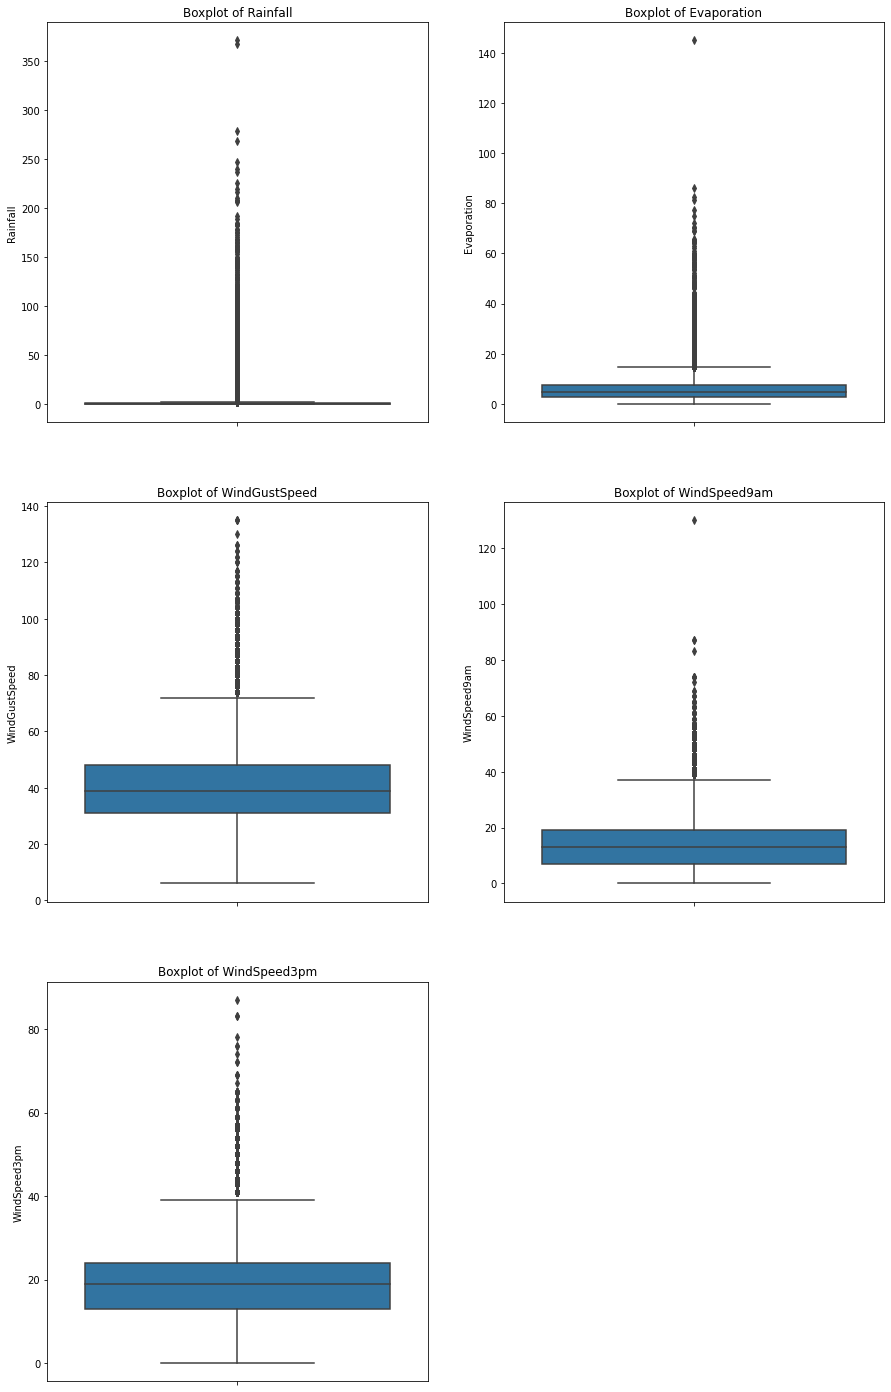

In [20]:
plt.figure(figsize=(15,25))

# Rainfall
plt.subplot(3, 2, 1)
fig = sns.boxplot(y=numericalData["Rainfall"])
fig.set_title('Boxplot of Rainfall')
fig.set_ylabel('Rainfall')

# Evaporation
plt.subplot(3, 2, 2)
fig = sns.boxplot(y=numericalData["Evaporation"])
fig.set_title('Boxplot of Evaporation')
fig.set_ylabel('Evaporation')

# WindGustSpeed
plt.subplot(3, 2, 3)
fig = sns.boxplot(y=numericalData["WindGustSpeed"])
fig.set_title('Boxplot of WindGustSpeed')
fig.set_ylabel('WindGustSpeed')

# WindSpeed9am
plt.subplot(3, 2, 4)
fig = sns.boxplot(y=numericalData["WindSpeed9am"])
fig.set_title('Boxplot of WindSpeed9am')
fig.set_ylabel('WindSpeed9am')

# WindSpeed3pm
plt.subplot(3, 2, 5)
fig = sns.boxplot(y=numericalData["WindSpeed3pm"])
fig.set_title('Boxplot of WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')

Histogram

Text(0, 0.5, 'WindSpeed3pm')

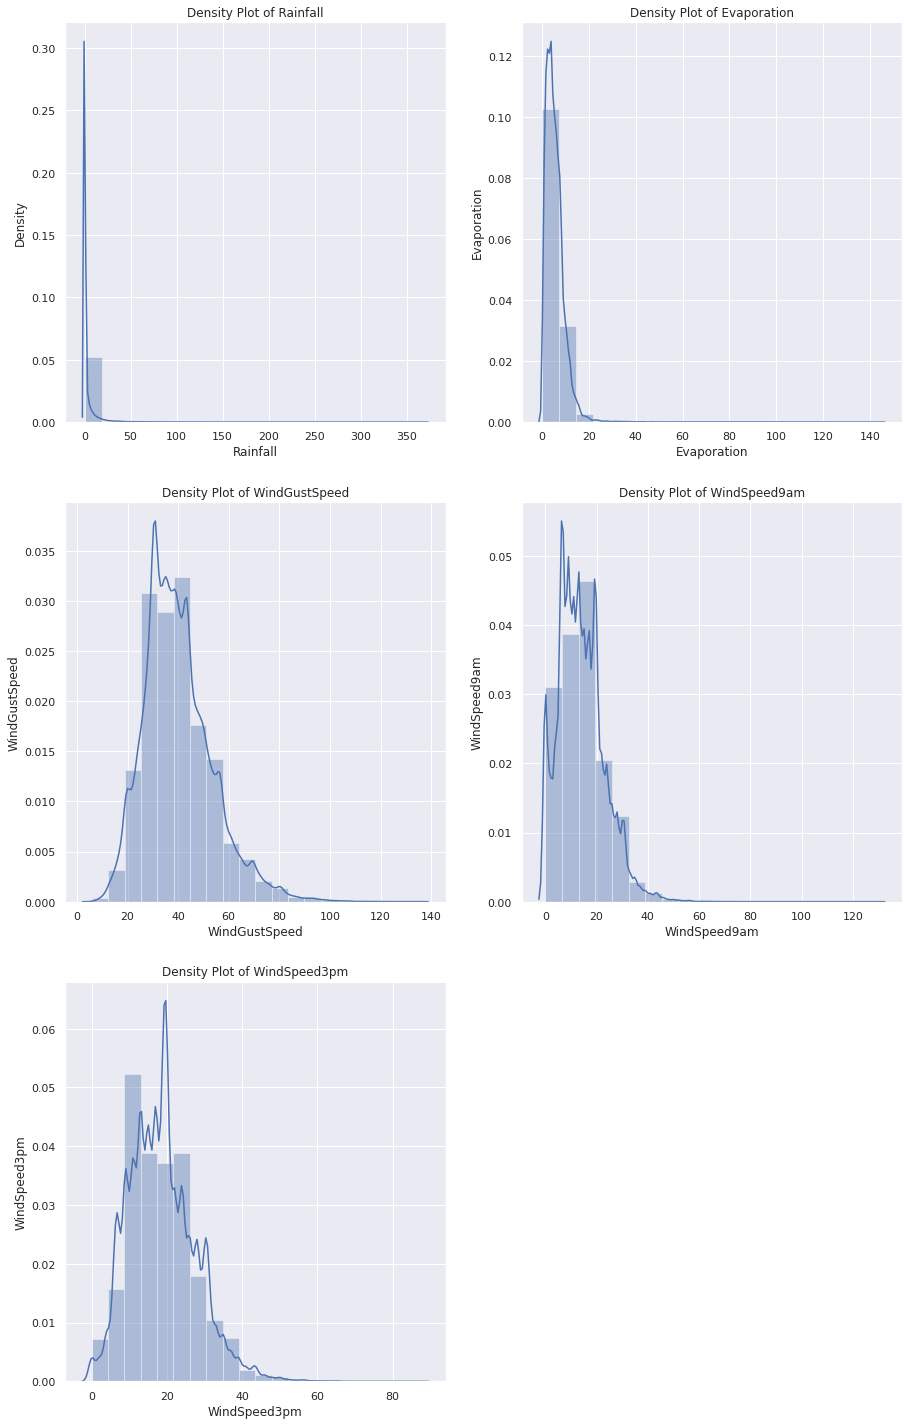

In [28]:
plt.figure(figsize=(15,25))
sns.set(style="darkgrid")

# Rainfall
plt.subplot(3, 2, 1)
fig = sns.distplot(numericalData["Rainfall"], bins=20)
fig.set_title('Density Plot of Rainfall')

# Evaporation
plt.subplot(3, 2, 2)
fig = sns.distplot(numericalData["Evaporation"], bins=20)
fig.set_title('Density Plot of Evaporation')
fig.set_ylabel('Evaporation')

# WindGustSpeed
plt.subplot(3, 2, 3)
fig = sns.distplot(numericalData["WindGustSpeed"], bins=20)
fig.set_title('Density Plot of WindGustSpeed')
fig.set_ylabel('WindGustSpeed')

# WindSpeed9am
plt.subplot(3, 2, 4)
fig = sns.distplot(numericalData["WindSpeed9am"], bins=20)
fig.set_title('Density Plot of WindSpeed9am')
fig.set_ylabel('WindSpeed9am')

# WindSpeed3pm
plt.subplot(3, 2, 5)
fig = sns.distplot(numericalData["WindSpeed3pm"], bins=20)
fig.set_title('Density Plot of WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')

## Multivariate Analysis

### Correlation Analysis

Pre-processing 3 - Encode Binary Variables

In [86]:
from sklearn.preprocessing import LabelEncoder

# Creating instance of LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values to binary variables
data['RainToday'] = labelencoder.fit_transform(data['RainToday'])
data['RainTomorrow'] = labelencoder.fit_transform(data['RainTomorrow'])

data.head()

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [67]:
# Pearson Correlation
correlation = data.corr()
correlation

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Year,1.000000,-0.113149,-0.005637,0.039245,0.058388,-0.009284,0.084141,0.011678,-0.032708,-0.021620,...,0.010708,-0.009150,0.031525,0.026412,0.063756,0.041443,0.041853,0.047649,-0.009141,-0.012039
Month,-0.113149,1.000000,0.009495,-0.204279,-0.164622,-0.030863,-0.027912,0.023885,0.060918,0.051039,...,-0.090564,-0.018541,0.036545,0.027088,-0.010314,-0.003829,-0.136625,-0.175708,0.007992,0.007328
Day,-0.005637,0.009495,1.000000,0.001507,-0.000495,0.001134,-0.007770,-0.001173,-0.009226,-0.009183,...,0.015610,0.013207,-0.021307,-0.021576,0.007176,-0.000610,-0.000849,-0.001286,0.003118,0.005379
MinTemp,0.039245,-0.204279,0.001507,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,...,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.052938,0.083936
MaxTemp,0.058388,-0.164622,-0.000495,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,...,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.214304,-0.159237
Rainfall,-0.009284,-0.030863,0.001134,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,...,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.239032
Evaporation,0.084141,-0.027912,-0.007770,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,...,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.185129,-0.119285
Sunshine,0.011678,0.023885,-0.001173,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,...,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.321128,-0.450768
WindGustSpeed,-0.032708,0.060918,-0.009226,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,...,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.146862,0.234010
WindSpeed9am,-0.021620,0.051039,-0.009183,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,...,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.100302,0.090995


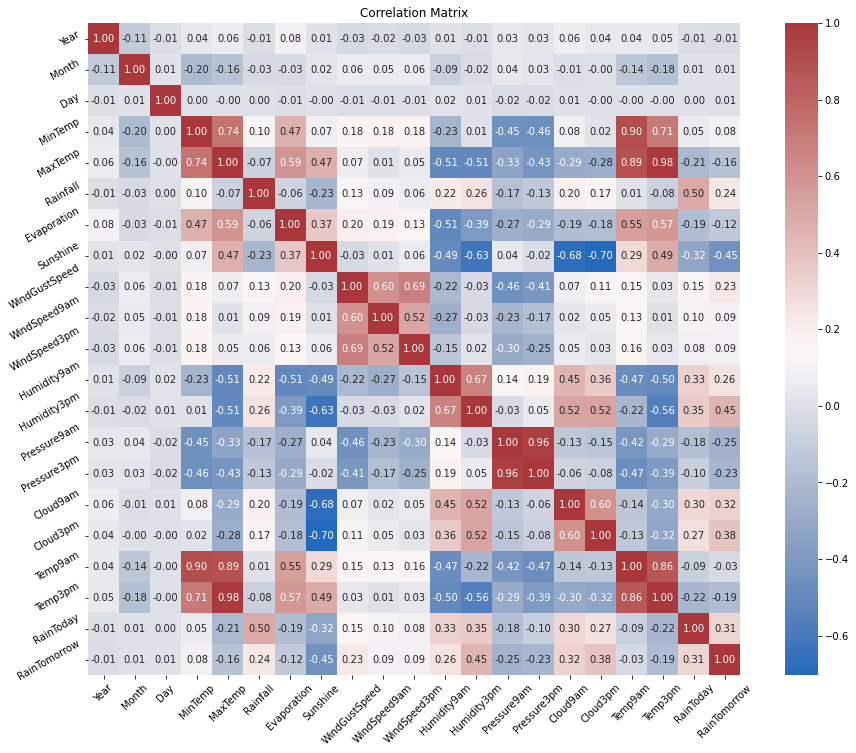

In [68]:
# Heatmap or Correlation Matrix
plt.figure(figsize=(16,12))
plt.title('Correlation Matrix')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', cmap='vlag')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### Pair Plot

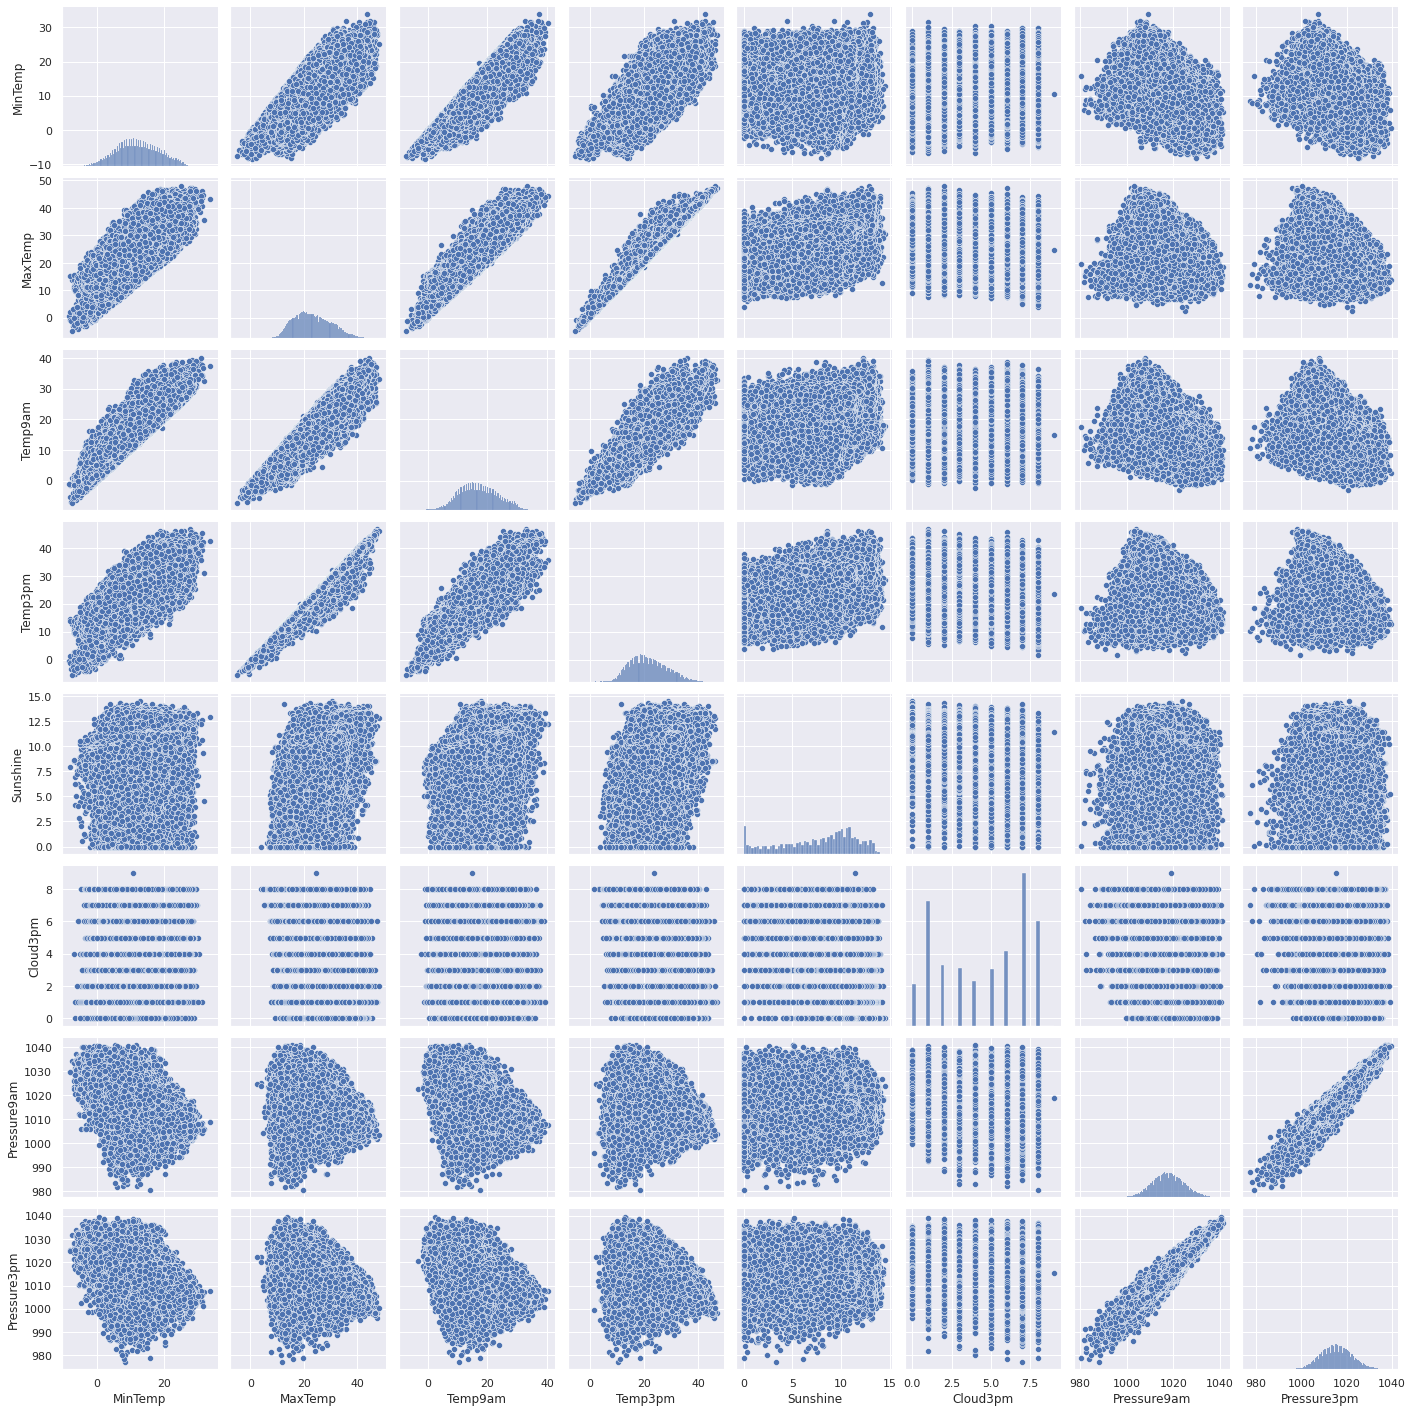

In [39]:
highCorrVariables = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Sunshine', 'Cloud3pm', 'Pressure9am', 'Pressure3pm']

sns.pairplot(data[highCorrVariables])

# Pre-processing

## Declare Feature Vector and Target Variable

In [176]:
X = data.drop(['RainTomorrow'], axis=1)
y = data[['RainTomorrow']]

## Split Train and Test Data

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 101)

## Impute Null Values

### Numerical Variables

In [178]:
# Replace null with median
for data1 in [X_train, X_test]:
  for column in data1:
    if data1[column].dtypes != 'object':
      median = X_train[column].median()
      data1[column].fillna(median, inplace=True)

### Categorical Variables

In [179]:
# Replace null with mode
for data2 in [X_train, X_test]:
  for column in data2:
    if data2[column].dtypes == 'object':
      mode = X_train[column].mode()[0]
      data2[column].fillna(mode, inplace=True)

In [92]:
X_train.isnull().sum()

Year             0
Month            0
Day              0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [93]:
X_test.isnull().sum()

Year             0
Month            0
Day              0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

## Handling Outliers

In [180]:
# Replace data exceeded upper limit with upper limit value
for data3 in [X_train, X_test]:
  data3['Rainfall'] = np.where(data3['Rainfall'] > 2.0, 2.0, data3['Rainfall'])
  data3['Evaporation'] = np.where(data3['Evaporation'] > 14.6, 14.6, data3['Evaporation'])
  data3['WindGustSpeed'] = np.where(data3['WindGustSpeed'] > 73.5, 73.5, data3['WindGustSpeed'])
  data3['WindSpeed9am'] = np.where(data3['WindSpeed9am'] > 37.0, 37.0, data3['WindSpeed9am'])
  data3['WindSpeed3pm'] = np.where(data3['WindSpeed3pm'] > 40.5, 40.5, data3['WindSpeed3pm'])

In [95]:
X_train.describe()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,2012.758549,6.401058,15.709927,12.181634,23.221097,0.480546,5.098169,8.044036,39.726687,13.894536,18.561308,68.875802,51.513529,1017.671171,1015.276835,4.649516,4.704248,16.983137,21.675978,0.240501
std,2.540342,3.425877,8.807541,6.386609,7.101725,0.788927,2.596852,2.767677,12.548641,8.547690,8.444093,18.930638,20.516950,6.753394,6.689745,2.293781,2.121587,6.468544,6.866570,0.449759
min,2007.000000,1.000000,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,2011.000000,3.000000,8.000000,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,2013.000000,6.000000,16.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,2015.000000,9.000000,23.000000,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.500000,6.000000,6.000000,21.500000,26.300000,0.000000
max,2017.000000,12.000000,31.000000,33.900000,48.100000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2.000000


In [96]:
X_test.describe()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,2012.760435,6.408488,15.735715,12.201287,23.242435,0.482419,5.098063,8.035036,39.782042,13.938746,18.543374,68.787967,51.424593,1017.606895,1015.204227,4.649777,4.696297,16.995854,21.675973,0.242941
std,2.544953,3.429074,8.760614,6.398323,7.141198,0.791257,2.604395,2.777503,12.513311,8.566547,8.460116,18.940174,20.593426,6.717533,6.649720,2.296701,2.107408,6.486940,6.890021,0.452020
min,2007.000000,1.000000,1.000000,-7.600000,-2.700000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,982.900000,981.200000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,2011.000000,3.000000,8.000000,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,2013.000000,6.000000,16.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,2015.000000,9.000000,23.000000,16.900000,28.300000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.500000,26.300000,0.000000
max,2017.000000,12.000000,31.000000,30.500000,47.300000,2.000000,14.600000,14.300000,73.500000,37.000000,40.500000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.200000,2.000000


## SMOTE

In [181]:
# Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
# Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. 
# In this case, Location, WindGustDir, WindDir9am & WindDir3pm are positioned in the fourth, tenth, twelfth, and 
# thirteenth column we input [3,9,11,12] as the parameter. 
smotenc = SMOTENC([3, 9, 11, 12],random_state = 101)

# Adding the over-sampled into the original train data
X_train, y_train = smotenc.fit_resample(X_train, y_train)

Plot a Bar Chart to View Frequency

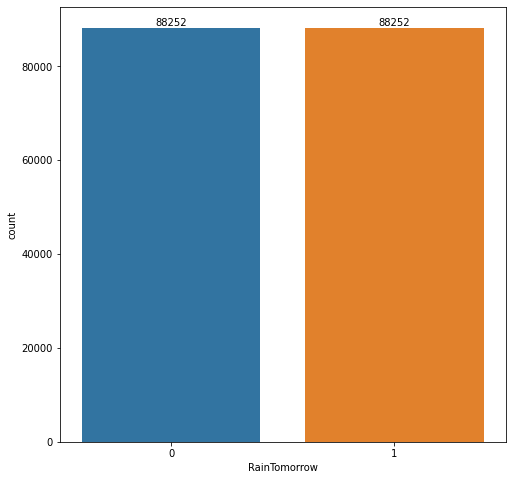

In [129]:
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X_train)
df_oversampler['RainTomorrow'] = pd.DataFrame(y_train)

plt.figure(figsize=(8,8))
ax = sns.countplot(df_oversampler['RainTomorrow'])
ax.bar_label(ax.containers[0])
plt.show()

Plot a Scatter Plot to View the Distribution

<AxesSubplot:xlabel='MinTemp', ylabel='Sunshine'>

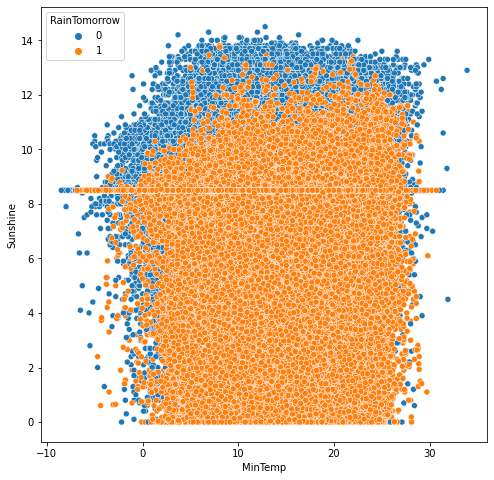

In [100]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df_oversampler, x ='MinTemp', y = 'Sunshine', hue = 'RainTomorrow')

## One Hot Encoding

Train Data

In [184]:
# Generate binary values using get_dummies
X_train = pd.concat([X_train,
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

# Remove original categorical inputs
X_train.drop('Location', axis=1, inplace = True)
X_train.drop('WindGustDir', axis=1, inplace = True)
X_train.drop('WindDir9am', axis=1, inplace = True)
X_train.drop('WindDir3pm', axis=1, inplace = True)

In [135]:
X_train.head()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2009,2,21,11.3,23.3,2.0,4.6,12.1,54.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,2013,1,21,19.2,29.2,1.4,4.8,8.5,31.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2011,2,14,12.5,27.1,0.0,7.0,9.4,39.0,11.0,...,0,0,0,1,0,0,0,0,0,0
3,2015,8,23,5.2,16.2,0.0,3.0,7.7,28.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,2012,8,8,9.1,14.9,2.0,4.0,7.4,70.0,28.0,...,0,0,0,0,0,0,0,0,1,0


Test Data

In [188]:
# Generate binary values using get_dummies
X_test = pd.concat([X_test,
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

# Remove original categorical inputs
X_test.drop('Location', axis=1, inplace = True)
X_test.drop('WindGustDir', axis=1, inplace = True)
X_test.drop('WindDir9am', axis=1, inplace = True)
X_test.drop('WindDir3pm', axis=1, inplace = True)

In [136]:
X_test.head()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
13783,2013,12,11,18.2,34.2,0.0,10.6,7.0,50.0,11.0,...,0,0,0,0,0,0,0,0,0,1
110478,2014,5,20,13.6,17.5,2.0,2.6,0.0,39.0,9.0,...,1,0,0,0,0,0,0,0,0,0
41575,2014,10,28,12.8,31.5,0.0,7.4,9.8,50.0,11.0,...,0,0,0,0,0,0,0,0,1,0
102736,2009,7,3,12.0,13.7,2.0,0.0,3.1,46.0,26.0,...,0,0,0,0,0,0,0,1,0,0
26703,2016,3,19,11.6,25.4,0.8,4.8,8.5,30.0,2.0,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [189]:
# Store the column name 
cols = X_train.columns

In [193]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)   # Fit transform on train
X_test = scaler.transform(X_test)        # Transform on test

In [194]:
# Convert it back to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [195]:
X_train.head()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.2,0.090909,0.666667,0.466981,0.531191,1.0,0.315068,0.834483,0.711111,0.189189,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.000000,0.666667,0.653302,0.642722,0.7,0.328767,0.586207,0.370370,0.108108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.090909,0.433333,0.495283,0.603025,0.0,0.479452,0.648276,0.488889,0.297297,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.636364,0.733333,0.323113,0.396975,0.0,0.205479,0.531034,0.325926,0.054054,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.5,0.636364,0.233333,0.415094,0.372401,1.0,0.273973,0.510345,0.948148,0.756757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [196]:
X_test.head()

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.6,1.000000,0.333333,0.629717,0.737240,0.0,0.726027,0.482759,0.651852,0.297297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.7,0.363636,0.633333,0.521226,0.421550,1.0,0.178082,0.000000,0.488889,0.243243,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.7,0.818182,0.900000,0.502358,0.686200,0.0,0.506849,0.675862,0.651852,0.297297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.545455,0.066667,0.483491,0.349716,1.0,0.000000,0.213793,0.592593,0.702703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.9,0.181818,0.600000,0.474057,0.570888,0.4,0.328767,0.586207,0.355556,0.054054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Construction

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [203]:
# Initialise the DNN
model = Sequential()
# Add the input layer and first hidden layer
model.add(Dense(12, input_shape=(117,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [204]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
17651/17651 [==============================] - 33s 2ms/step - loss: 0.4337 - accuracy: 0.7967
Epoch 2/150
17651/17651 [==============================] - 31s 2ms/step - loss: 0.3950 - accuracy: 0.8176
Epoch 3/150
17651/17651 [==============================] - 31s 2ms/step - loss: 0.3854 - accuracy: 0.8227
Epoch 4/150
17651/17651 [==============================] - 31s 2ms/step - loss: 0.3789 - accuracy: 0.8262
Epoch 5/150
17651/17651 [==============================] - 33s 2ms/step - loss: 0.3742 - accuracy: 0.8285
Epoch 6/150
17651/17651 [==============================] - 35s 2ms/step - loss: 0.3713 - accuracy: 0.8302
Epoch 7/150
17651/17651 [==============================] - 31s 2ms/step - loss: 0.3693 - accuracy: 0.8313
Epoch 8/150
17651/17651 [==============================] - 31s 2ms/step - loss: 0.3674 - accuracy: 0.8330
Epoch 9/150
17651/17651 [==============================] - 36s 2ms/step - loss: 0.3654 - accuracy: 0.8333
Epoch 10/150
17651/17651 [====================

In [207]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

5516/5516 [==============================] - 13s 2ms/step - loss: 0.3342 - accuracy: 0.8498
Accuracy: 84.98


In [208]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # threshold
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [209]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[19206,  2858],
       [ 1803,  4572]])

In [210]:
print(classification_report(y_test, y_pred))

# Take weighted avg/ micro avg

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     22064
           1       0.62      0.72      0.66      6375

    accuracy                           0.84     28439
   macro avg       0.76      0.79      0.78     28439
weighted avg       0.85      0.84      0.84     28439



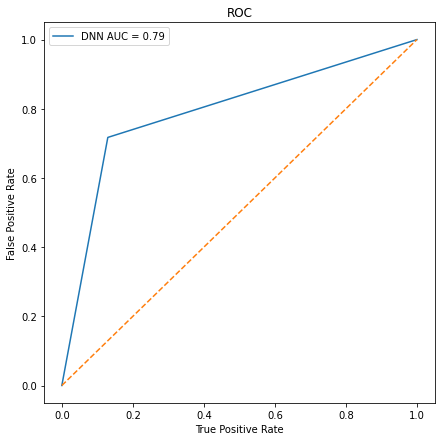

In [211]:
import sklearn.metrics as metrics
false_positive_rate, true_positive_rate, treshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
# 0.8 or above = acceptable
# 0.9 best model

plt.subplots(1, figsize=(7,7))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label = 'DNN AUC = %0.2f' % roc_auc)
plt.plot([0, 1], ls = '--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

## ANN

### Build and Visualise ANN

In [9]:
# Initialise the ANN
model = Sequential()
# Add the input layer and first hidden layer
model.add(Dense(units=len(X_train.columns)+1, input_shape=(117,), activation='relu'))
# Add the second hidden layer
model.add(Dense(units=60, activation='relu'))
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 118)               13924     
                                                                 
 dense_1 (Dense)             (None, 60)                7140      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 21,125
Trainable params: 21,125
Non-trainable params: 0
_________________________________________________________________


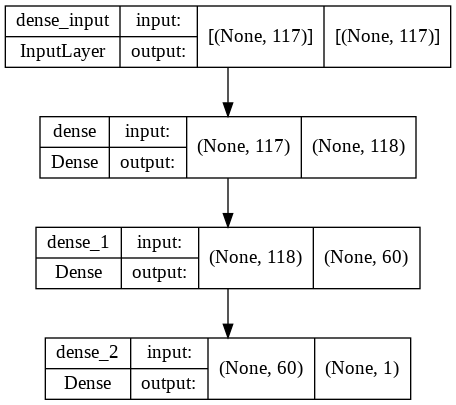

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,
           to_file="/content/drive/MyDrive/ann_model.png",
           show_shapes=True,
           show_layer_names=True,
          )

### Train ANN

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.33)

Epoch 1/100
3696/3696 [==============================] - 14s 4ms/step - loss: 0.1756 - accuracy: 0.9261 - val_loss: 0.1597 - val_accuracy: 0.9317
Epoch 2/100
3696/3696 [==============================] - 10s 3ms/step - loss: 0.1696 - accuracy: 0.9295 - val_loss: 0.2046 - val_accuracy: 0.9075
Epoch 3/100
3696/3696 [==============================] - 10s 3ms/step - loss: 0.1670 - accuracy: 0.9304 - val_loss: 0.1807 - val_accuracy: 0.9193
Epoch 4/100
3696/3696 [==============================] - 11s 3ms/step - loss: 0.1649 - accuracy: 0.9307 - val_loss: 0.2405 - val_accuracy: 0.8937
Epoch 5/100
3696/3696 [==============================] - 11s 3ms/step - loss: 0.1630 - accuracy: 0.9322 - val_loss: 0.2033 - val_accuracy: 0.9105
Epoch 6/100
3696/3696 [==============================] - 11s 3ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.3025 - val_accuracy: 0.8669
Epoch 7/100
3696/3696 [==============================] - 10s 3ms/step - loss: 0.1607 - accuracy: 0.9339 - val_loss: 0.2328 -

### Evaluate ANN

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


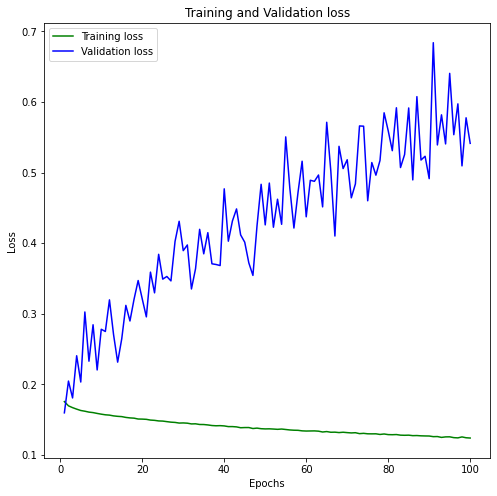

In [33]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)

plt.subplots(1, figsize=(8,8))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

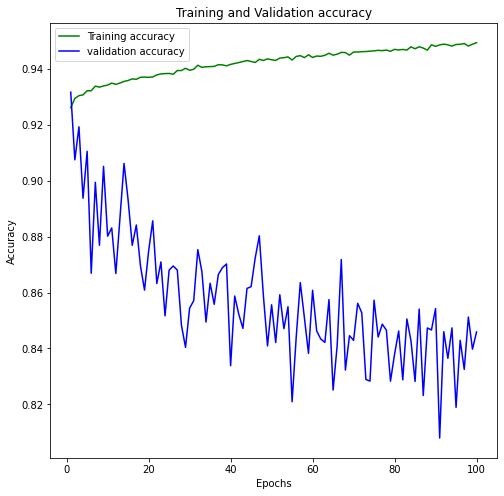

In [35]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)

plt.subplots(1, figsize=(8,8))
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

5516/5516 [==============================] - 9s 2ms/step - loss: 0.2518 - accuracy: 0.9202
Accuracy: 92.02


In [38]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # threshold
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(accuracy_score(y_test, y_pred))

[[18856  3208]
 [ 2495  3880]]
0.7994655226977039


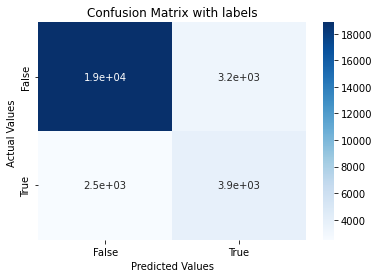

In [40]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     22064
           1       0.55      0.61      0.58      6375

    accuracy                           0.80     28439
   macro avg       0.72      0.73      0.72     28439
weighted avg       0.81      0.80      0.80     28439



### Hyperparamater Tuning

In [131]:
# Used a parameter to specify the optimizer
def build_classifier(optimizer = 'adam', activation = 'relu'):
  classifier = Sequential()
  classifier.add(Dense(units=len(X_train.columns)+1, input_shape=(117,), activation=activation))
  classifier.add(Dense(units=60, activation=activation))
  classifier.add(Dense(units=1, activation='sigmoid'))

  classifier.compile(optimizer=optimizer , loss = 'binary_crossentropy', metrics=['accuracy'])
  
  return classifier

In [132]:
from keras.wrappers.scikit_learn import KerasClassifier

model2 = KerasClassifier(build_fn = build_classifier)

In [135]:
from sklearn.model_selection import RandomizedSearchCV

params = [{
        'batch_size':[8, 16, 32],
        'epochs': [50, 100, 200],
        'optimizer': ['adam', 'RMSprop', 'SGD'],
        'activation': ['sigmoid', 'relu', 'tanh']
        }]

gs = RandomizedSearchCV(estimator=model2, param_grid=params, cv=5, scoring='accuracy')

In [137]:
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

 2020/19857 [==>...........................] - ETA: 1:15 - loss: 0.4751 - accuracy: 0.7686

KeyboardInterrupt: ignored

In [ ]:
best_params = gs.best_params_
best_accuracy = gs.best_score

print(best_params)
print(best_accuracy)

# Export Cleaned Dataset

In [ ]:
X_train.to_csv('/content/drive/MyDrive/AusWeather_X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/AusWeather_X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/AusWeather_y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/AusWeather_y_test.csv', index=False)

In [4]:
dataCleaned = pd.read_csv('/content/drive/MyDrive/AusWeather_Cleaned.csv')
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           142193 non-null  int64  
 1   Month          142193 non-null  int64  
 2   Day            142193 non-null  int64  
 3   Location       142193 non-null  object 
 4   MinTemp        142193 non-null  float64
 5   MaxTemp        142193 non-null  float64
 6   Rainfall       142193 non-null  float64
 7   Evaporation    142193 non-null  float64
 8   Sunshine       142193 non-null  float64
 9   WindGustDir    142193 non-null  object 
 10  WindGustSpeed  142193 non-null  float64
 11  WindDir9am     142193 non-null  object 
 12  WindDir3pm     142193 non-null  object 
 13  WindSpeed9am   142193 non-null  float64
 14  WindSpeed3pm   142193 non-null  float64
 15  Humidity9am    142193 non-null  float64
 16  Humidity3pm    142193 non-null  float64
 17  Pressure9am    142193 non-nul

In [5]:
# Read cleaned data
X_train = pd.read_csv('/content/drive/MyDrive/AusWeather_X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/AusWeather_X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/AusWeather_y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/AusWeather_y_test.csv')